Class Ex.1 by Matan Porat and Rotem Tsalisher

Guidlines:
 - All functions are implemented in the notebook
 - Names of functions are determined by the question number
 - All functions are called in the main function (last function in the notebook)

In [415]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [416]:
def calcGaussian(x,mu,sig,pi = 1):
    # Calculate the denominator of the Gaussian distribution
    denominator = math.sqrt(2 * math.pi * sigma**2)
    
    # Calculate the exponent term
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    
    # Calculate the Gaussian distribution
    gaussian = (1 / denominator) * np.exp(exponent)
    
    return pi*gaussian


In [417]:
def plotGaussian(x,gauss,N=1000):
    
    plt.plot(x,gauss)
    plt.grid(visible=True)
    plt.xlabel("x")
    plt.ylabel("p(x)")
    
    return

Q2:

In [418]:
def q2(mu,sig):
    N = 1000;
    a = 4;
    x = np.linspace(mu - a*sig, mu+a*sig, N); # set the grid
    
    gauss = calcGaussian(x,mu,sig); # calculate the Gaussian values
    plotGaussian(x,gauss,N); # plot the Gaussian
    plt.title("Graph of N(1,1)")
    return

Q3:

In [419]:
def q3(mu,sig,pi):
    a = 4;
    N = 1000;

    gauss = np.zeros((3,N));
    x = np.linspace(min(mu-a*sig),max(mu+a*sig),N);
    for i in range(2):
        gauss[i] = calcGaussian(x,mu[i],sig[i],pi[i]);
        plotGaussian(x,gauss[i])
        
    gauss[2] = np.sum(gauss,axis=0)
    plotGaussian(x,gauss[2])
    plt.title("Graphs of N1(3,1),N2(0,1),N1+N2")
    plt.legend(labels = ("pi0 = %.2f" %pi[0], "pi1 = %.2f" %(pi[1])));
    return

Q4:

In [420]:
# q4 is q3 with different pi vector:
# will call q3 with the correct pi vector inside main function

Q5:

In [421]:
def q5(mu,sig,pi):
    
    x0 = 0.25;
    q3(mu,sig,pi);
    
    px0_y0 = calcGaussian(x0,mu[0],sig[0],pi[0]); # x0 with y0 params
    # p(y=y0) = pi0
    px0_y1 = calcGaussian(x0,mu[1],sig[1],pi[1]);
    p0 = (pi[0]*px0_y0)/(pi[0]*px0_y0 + pi[1]*px0_y1);
    
    plt.plot(x0,p0,marker="x");
    plt.title("Probability of p(y0=0|x0=0.25)");
    plt.text(x0 - 1.8, p0+.01, "{x0 = %.2f\n p(y0=0|x0) = %.4f}"%(x0,p0))
    return

In [422]:
def q6(mu,sig,pi):
    q3(mu,sig,pi);
    
    # by the formula we developed in class
    # th = (mu[1]+mu[0])/2 + ln(pi[1]/pi[0])*(sig[1]^2)/(mu[0]-mu[1])
    # x0 = the wanted threshold
    
    th = (mu[1]+mu[0])/2 + math.log(pi[1]/pi[0])*(sig[1]**2)/(mu[0]-mu[1])
    p0 = calcGaussian(th, mu[0],sig[0], pi[0])
    plt.plot(th,p0,marker="x");
    plt.title("Threshold for Decision Criteria");
    plt.text(th +0.05, p0, "{thresh: x = %.2f}"%(th))
    return

Q7:

In [423]:
def q7(mu,sig,pi):
    q5(mu,sig,pi);
    plt.figure();
    q6(mu,sig,pi);
    return

Q8:

In [424]:
def q8(mu,sig,N = 1000):
    pi0 = np.linspace((1/N),1-(1/N),N); # set a low thresh to not encounter a 0-division;
    pi1 = 1-pi0;
    th = (mu[1]+mu[0])/2 + np.log(pi1/pi0)*(sig[1]**2)/(mu[0]-mu[1])
    plt.plot(pi0,th);
    plt.title("a as a function of pi0");
    plt.grid(visible = True);
    return

Main:

In [425]:
def main():
    # q2:
    plt.figure()
    mu = 1;
    sigma = 1;
    q2(1,1);
    
    # q3:
    plt.figure()
    mu = np.array([3, 0])
    sigma = np.sqrt(np.array([1, 1]))
    pi = np.array([0.5, 0.5])
    q3(mu,sigma,pi);
    
    # q4 (q4 is q3 with different pi vector):
    plt.figure()
    pi = np.array([0.25, 0.75])
    q3(mu,sigma,pi)
    
    # q5:
    plt.figure()
    pi = np.array([0.5, 0.5])
    q5(mu,sigma,pi) 
    
    # q6:
    plt.figure()
    q6(mu,sigma,pi)
    
    # q7:
    plt.figure()
    pi = np.array([0.25,0.75])
    q7(mu,sigma,pi)
    
    # q8:
    plt.figure()
    N = 1000;
    q8(mu,sigma,N); # evaluate a as a function of pi0 over N points
    
    return

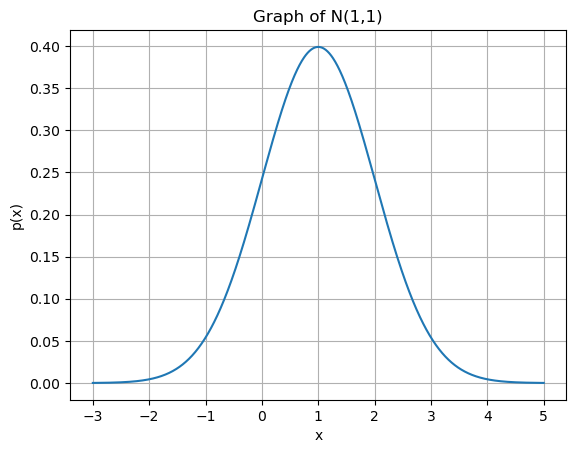

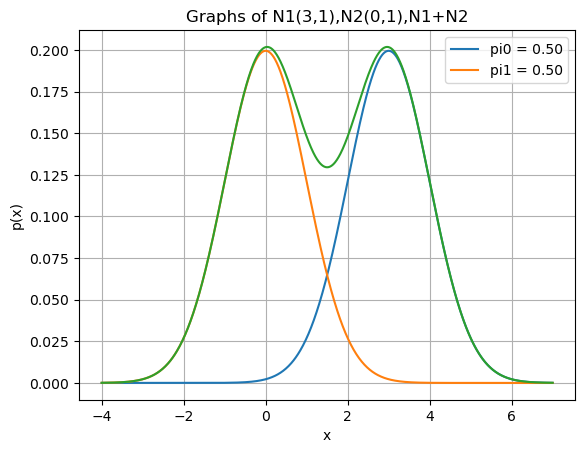

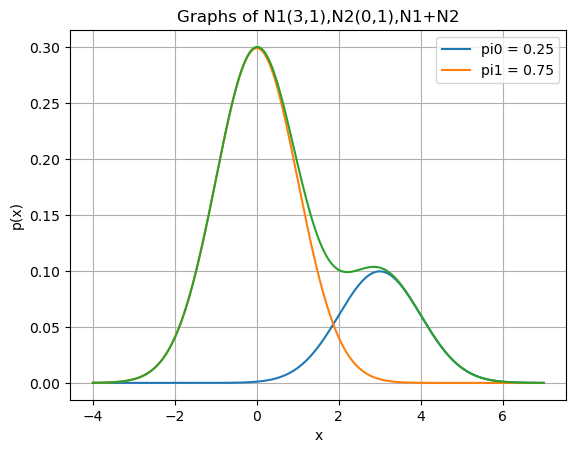

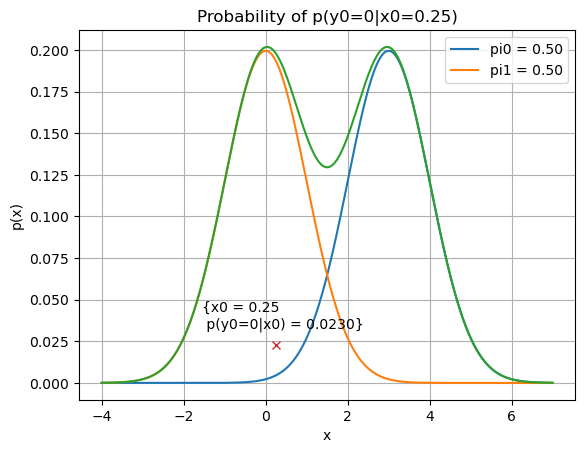

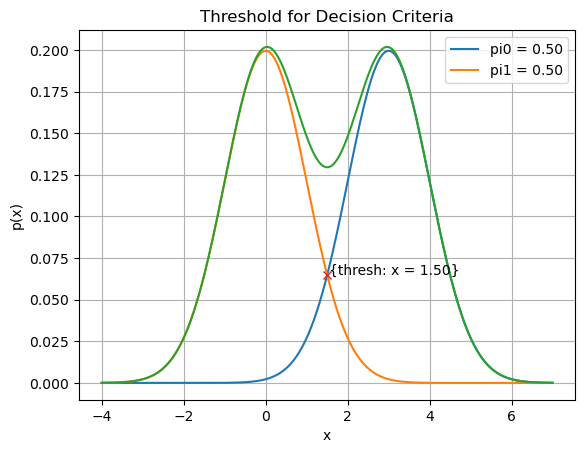

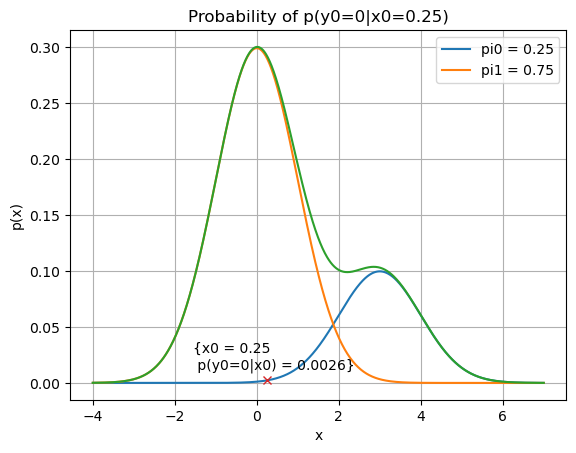

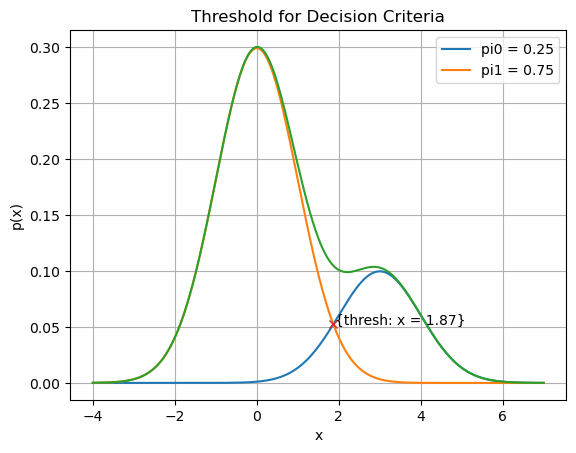

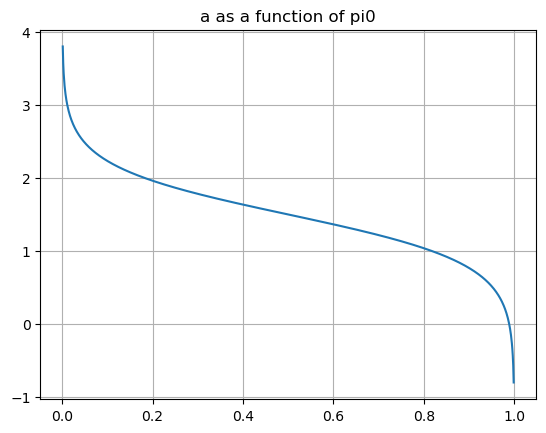

In [426]:
main()